In [1]:
from Funcs.Utility import *
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p = os.path.join(PATH_INTERMEDIATE, 'calorie_count_binary_personal-15min.pkl')
X, y, groups, t, datetimes = load(p)

In [3]:
#Divide the features into different categories
feat_current = X.loc[:,[('#VAL' in str(x)) or ('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_dsc = X.loc[:,[('#DSC' in str(x))  for x in X.keys()]]  
feat_yesterday = X.loc[:,[('Yesterday' in str(x))  for x in X.keys()]]  
feat_today = X.loc[:,[('Today' in str(x))  for x in X.keys()]]  
feat_sleep = X.loc[:,[('Sleep' in str(x))  for x in X.keys()]]  
feat_time = X.loc[:,[('Time' in str(x))  for x in X.keys()]]  
feat_pif = X.loc[:,[('PIF' in str(x))  for x in X.keys()]]  
feat_ImmediatePast = X.loc[:,[('ImmediatePast_15' in str(x))  for x in X.keys()]]
#Divide the time window features into sensor/past stress label
feat_current_sensor = X.loc[:,[('#VAL' in str(x))  for x in X.keys()]]  
feat_current_ESM = X.loc[:,[('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_ImmediatePast_sensor = feat_ImmediatePast.loc[:,[('ESM' not in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_ImmediatePast_ESM = feat_ImmediatePast.loc[:,[('ESM'  in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_today_sensor = feat_today.loc[:,[('ESM' not in str(x))  for x in feat_today.keys()]]  
feat_today_ESM = feat_today.loc[:,[('ESM'  in str(x)) for x in feat_today.keys()]]  
feat_yesterday_sensor = feat_yesterday.loc[:,[('ESM' not in str(x)) for x in feat_yesterday.keys()]]  
feat_yesterday_ESM = feat_yesterday.loc[:,[('ESM'  in str(x)) for x in feat_yesterday.keys()]]

In [4]:
feat_baseline = pd.concat([ feat_time,feat_dsc,feat_current_sensor, feat_sleep],axis=1)
feat_final = pd.concat([feat_baseline  ], axis=1)
# # Fill NaN values with zeros
feat_final = feat_final.fillna(0)
X = feat_final
cats = X.columns[X.dtypes == bool]

In [5]:
X = X[[col for col in X.columns if not col.endswith('#ImmediatePast_15')]]
cn = X.columns.tolist()
print(cn)

['PIF#participationStartTimestamp', 'Time#DOW=MON', 'Time#DOW=TUE', 'Time#DOW=WED', 'Time#DOW=THU', 'Time#DOW=FRI', 'Time#DOW=SAT', 'Time#DOW=SUN', 'Time#WKD=Y', 'Time#WKD=N', 'Time#HRN=DAWN', 'Time#HRN=MORNING', 'Time#HRN=AFTERNOON', 'Time#HRN=LATE_AFTERNOON', 'Time#HRN=EVENING', 'Time#HRN=NIGHT', 'Time#HRN=MIDNIGHT', 'APP_CAT#DSC', 'APP_CAT#DSC=UNKNOWNSYSTEMENTERSOCIALHEALTHWORKINFO', 'BAT_STA#DSC', 'BAT_STA#DSC=DISCHARGINGCHARGINGFULLNOT_CHARGING', 'BAT_PLG#DSC', 'BAT_PLG#DSC=UNDEFINEDACUSBWIRELESS', 'CALL_CNT#DSC', 'CALL_CNT#DSC=UNKNOWNMOBILEOTHERWORKHOMEUNDEFINEDMAIN', 'LOC_LABEL#DSC', 'LOC_LABEL#DSC=noneworkhome', 'SCR_EVENT#DSC', 'SCR_EVENT#DSC=SCREEN_OFFSCREEN_ONUSER_PRESENT', 'RING#DSC', 'RING#DSC=VIBRATESILENTNORMAL', 'CHG#DSC', 'CHG#DSC=DISCONNECTED', 'CHG#DSC=CONNECTED', 'BT_BondState#DSC', 'BT_BondState#DSC=NONEBONDEDBONDING', 'BT_DeviceType#DSC', 'BT_DeviceType#DSC=LECLASSICUNDEFINEDDUAL', 'BT_classType#DSC', 'BT_classType#DSC=UNDEFINEDPHONE_SMARTWEARABLE_WRIST_WATCHCOMPU

In [6]:
X['SCR_EVENT#DSC']

0        4090.206055
1        1286.406982
2         333.231995
3          85.964996
4        3620.405029
            ...     
21614      23.236000
21615     278.307007
21616      25.344000
21617     278.425995
21618      27.808001
Name: SCR_EVENT#DSC, Length: 21619, dtype: float32

In [7]:
df = pd.DataFrame(X)
df['UserId'] = groups
df['Timestamp'] = pd.to_datetime(datetimes)

In [8]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


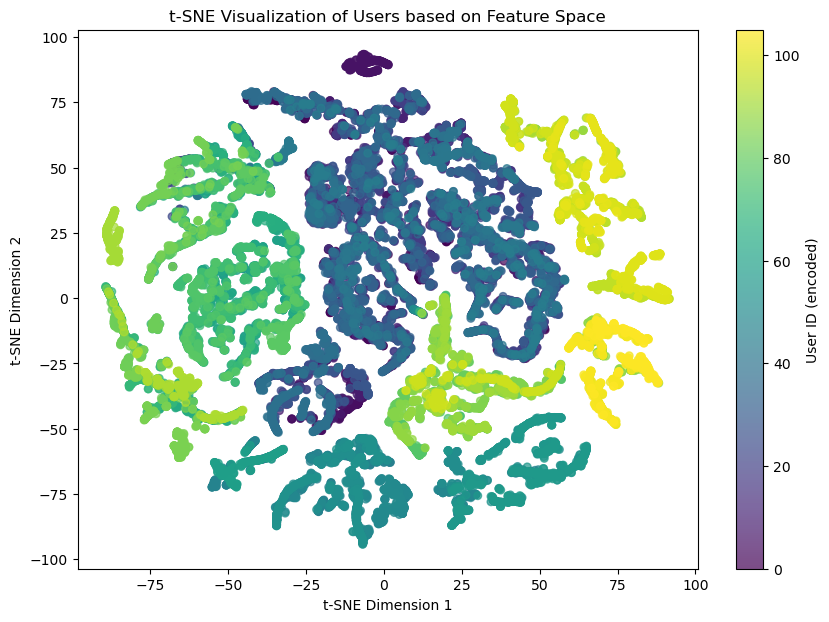

In [9]:
# Encode UserId to numerical labels for color mapping
label_encoder = LabelEncoder()
df['UserId_encoded'] = label_encoder.fit_transform(df['UserId'])

# Initializing t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(df.drop(columns=['UserId', 'Timestamp']))

# Adding the t-SNE results back to the dataframe for visualization
df['tsne-2d-one'] = tsne_results[:, 0]
df['tsne-2d-two'] = tsne_results[:, 1]

# Plotting
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['tsne-2d-one'], df['tsne-2d-two'], c=df['UserId_encoded'], cmap="viridis", alpha=0.7, s=30)
plt.colorbar(scatter, label='User ID (encoded)')
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of Users based on Feature Space")
plt.show()

# Data Visualization for Location & App Usage (EDA Version)
We need to conduct EDA for location and app usage since the current version of location and app usage data is problematic. 

The current location labels only contain two categories either home or work. We need to carefully go through the data and check the labeling mechanism. Especially, we previously used the center of KAIST main campus and MUNJI campus to help decide the location of work cluster. Does it also apply to D#4 or D#2, 3? The key is whether the dataset is collected among KAIST students.

Think about Graduate School of AI & Buisness as well. Is Seoul campus in service during data collection? What if more than one home? Say back to another home in Seoul?

Regarding app usage, there is only type named app_unknown which is weird. Carefully check the raw data and preprocessed data to debug why it happens.

## Location EDA

In [ ]:
import os
import pandas as p
import numpy as np
from Funcs.Utility import *

uids =os.listdir(PATH_SENSOR)

len(uids)
num_entries = 5

# Randomly select entries
random_entries = np.random.choice(uids, num_entries, replace=False)

In [30]:
df_loc_P1 = pd.read_csv(os.path.join(PATH_SENSOR, uids[4], 'Location.csv'))

In [27]:
df_loc_P1

timestamp   latitude   longitude   altitude  accuracy     speed
0     1640140248983  36.374013  127.356455  98.900002    10.851  0.000000
1     1640140093541  36.374096  127.356269  98.900002    96.000  0.685276
2     1640138763585  36.374012  127.356457  98.900002    11.416  0.000000
3     1640138659044  36.374044  127.356519  98.900002     3.900  0.601100
4     1640138521028  36.374016  127.356457  98.900002    11.204  0.000000
...             ...        ...         ...        ...       ...       ...
3122  1637736863799  36.374062  127.356460  98.316021    11.451  0.000000
3123  1637736291896  36.374041  127.356456  98.408606    13.305  0.000000
3124  1637736169231  36.374129  127.356391  97.654634    19.056  0.000000
3125  1637736063698  36.374094  127.356559  98.663063   128.000  1.554358
3126  1637733507109  36.374050  127.356444  98.975323    12.604  0.000000

[3127 rows x 6 columns]

In [31]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import DBSCAN



# Extract latitude and longitude values
coordinates = df_loc_P1[['latitude', 'longitude']].values

# Apply DBSCAN for clustering
db = DBSCAN(eps=0.5, min_samples=2).fit(coordinates)
df_loc_P1['cluster'] = db.labels_

# Replace -1 with 'Noise' for visualization purposes
df_loc_P1['cluster'] = df_loc_P1['cluster'].replace(-1, 'Noise')

# Create a Folium map centered at the median of the latitude and longitude
map_center = [df_loc_P1['latitude'].median(), df_loc_P1['longitude'].median()]
m = folium.Map(location=map_center, zoom_start=5)

# Add MarkerCluster to the map
marker_cluster = MarkerCluster().add_to(m)

# Add points to the MarkerCluster
for idx, row in df_loc_P1.iterrows():
    cluster_label = row['cluster']
    popup_text = f"Timestamp: {row['timestamp']}<br>Cluster: {cluster_label}"
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text,
        icon=folium.Icon(color='blue' if cluster_label == 'Noise' else 'green', icon='info-sign')
    ).add_to(marker_cluster)

# Display the map
# m.save('gps_clusters_map.html')
m

In [ ]:
import folium

# Define the center of KAIST
kaist_seoul_center = [37.5933, 127.0464]

# Define the map object with the center of KAIST as the starting point
m = folium.Map(location=kaist_seoul_center, zoom_start=13)

# Define a circle marker at the center of KAIST
folium.CircleMarker(
    location=kaist_seoul_center,
    radius=5,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=1.0,
    popup='KAIST Seoul Center',
).add_to(m)

# Define a circle around the center of KAIST with a radius of 1 km
folium.Circle(
    location=kaist_seoul_center,
    radius=300,
    color='blue',
    fill=False,
    popup='300 m radius boundary',
).add_to(m)

# Display the map object
m


## App Usage EDA

In [1]:
import os
import pandas as p
import numpy as np
from Funcs.Utility import *

uids =os.listdir(PATH_SENSOR)

len(uids)
num_entries = 5

# Randomly select entries
random_entries = np.random.choice(uids, num_entries, replace=False)

In [2]:
df_app_test = pd.read_csv(os.path.join(PATH_SENSOR, uids[0], 'AppUsageEvent.csv'))
df_app_test

timestamp                name_x                   packageName  \
0      1638772630303            ABC Logger         kaist.iclab.abclogger   
1      1638772630311           One UI Home  com.sec.android.app.launcher   
2      1638772631006           One UI Home  com.sec.android.app.launcher   
3      1638772631007               YouTube    com.google.android.youtube   
4      1638772645888               YouTube    com.google.android.youtube   
...              ...                   ...                           ...   
70727  1641351108798  Google Play services        com.google.android.gms   
70728  1641351109988  Google Play services        com.google.android.gms   
70729  1641351109994      Samsung Internet  com.sec.android.app.sbrowser   
70730  1641351110052      Samsung Internet  com.sec.android.app.sbrowser   
70731  1641351110123      Samsung Internet  com.sec.android.app.sbrowser   

                   type  isSystemApp  isUpdatedSystemApp  \
0       ACTIVITY_PAUSED        False               False   
1      ACTIVITY_RESUMED         True               False   
2       ACTIVITY_PAUSED         True               False   
3      ACTIVITY_RESUMED        False               False   
4       ACTIVITY_PAUSED        False               False   
...                 ...          ...                 ...   
70727  ACTIVITY_RESUMED         True                True   
70728   ACTIVITY_PAUSED         True                True   
70729  ACTIVITY_RESUMED        False               False   
70730   ACTIVITY_PAUSED        False               False   
70731  ACTIVITY_RESUMED        False               False   

                         name_y         category           source  
0                           NaN            TOOLS              NaN  
1           Samsung One UI Home  PERSONALIZATION  play.google.com  
2           Samsung One UI Home  PERSONALIZATION  play.google.com  
3                       YouTube    VIDEO_PLAYERS  play.google.com  
4                       YouTube    VIDEO_PLAYERS  play.google.com  
...                         ...              ...              ...  
70727      Google Play services            TOOLS  play.google.com  
70728      Google Play services            TOOLS  play.google.com  
70729  Samsung Internet Browser    COMMUNICATION  play.google.com  
70730  Samsung Internet Browser    COMMUNICATION  play.google.com  
70731  Samsung Internet Browser    COMMUNICATION  play.google.com  

[70732 rows x 9 columns]

In [3]:
df_app_test = df_app_test.loc[
        lambda x: x['type'].isin(['ACTIVITY_RESUMED', 'ACTIVITY_PAUSED']), :
    ].assign(
        category=lambda x: np.where(x['type'] == 'ACTIVITY_RESUMED', x['category'], None),
    )

In [4]:
df_app_test = df_app_test.rename(columns={'category': 'subcategory'})
df_app_test['category'] = [transform.get(item, item) for item in df_app_test['subcategory'].values]

In [5]:
df_app_test

timestamp                name_x                   packageName  \
0      1638772630303            ABC Logger         kaist.iclab.abclogger   
1      1638772630311           One UI Home  com.sec.android.app.launcher   
2      1638772631006           One UI Home  com.sec.android.app.launcher   
3      1638772631007               YouTube    com.google.android.youtube   
4      1638772645888               YouTube    com.google.android.youtube   
...              ...                   ...                           ...   
70727  1641351108798  Google Play services        com.google.android.gms   
70728  1641351109988  Google Play services        com.google.android.gms   
70729  1641351109994      Samsung Internet  com.sec.android.app.sbrowser   
70730  1641351110052      Samsung Internet  com.sec.android.app.sbrowser   
70731  1641351110123      Samsung Internet  com.sec.android.app.sbrowser   

                   type  isSystemApp  isUpdatedSystemApp  \
0       ACTIVITY_PAUSED        False               False   
1      ACTIVITY_RESUMED         True               False   
2       ACTIVITY_PAUSED         True               False   
3      ACTIVITY_RESUMED        False               False   
4       ACTIVITY_PAUSED        False               False   
...                 ...          ...                 ...   
70727  ACTIVITY_RESUMED         True                True   
70728   ACTIVITY_PAUSED         True                True   
70729  ACTIVITY_RESUMED        False               False   
70730   ACTIVITY_PAUSED        False               False   
70731  ACTIVITY_RESUMED        False               False   

                         name_y      subcategory           source category  
0                           NaN             None              NaN  UNKNOWN  
1           Samsung One UI Home  PERSONALIZATION  play.google.com   SYSTEM  
2           Samsung One UI Home             None  play.google.com  UNKNOWN  
3                       YouTube    VIDEO_PLAYERS  play.google.com    ENTER  
4                       YouTube             None  play.google.com  UNKNOWN  
...                         ...              ...              ...      ...  
70727      Google Play services            TOOLS  play.google.com   SYSTEM  
70728      Google Play services             None  play.google.com  UNKNOWN  
70729  Samsung Internet Browser    COMMUNICATION  play.google.com   SOCIAL  
70730  Samsung Internet Browser             None  play.google.com  UNKNOWN  
70731  Samsung Internet Browser    COMMUNICATION  play.google.com   SOCIAL  

[70732 rows x 10 columns]

In [37]:
from Funcs.Utility import _load_data
data_type = 'AppUsageEvent'
abbrev = DATA_TYPES[data_type]
data_raw = _load_data(data_type)

# Debugging: Check if data_raw is empty
if data_raw.empty:
    print(f"No data loaded for {data_type}")
    log(f"No data loaded for {data_type}")

data = data_raw.copy()
del data_raw
# Filter the data to include only relevant types of app usage events
data = data.loc[
    lambda x: x['type'].isin(['ACTIVITY_RESUMED', 'ACTIVITY_PAUSED']), :
].assign(
    category=lambda x: np.where(x['type'] == 'ACTIVITY_RESUMED', x['category'], None),
)

data = data.rename(columns={'category': 'subcategory'})
data['category'] = [transform.get(item, item) for item in data['subcategory'].values]


move = data.copy()
Duration = []
for pcode in data.index.get_level_values('pcode').unique():
    sub_move = move.loc[(pcode, ), :].sort_index(axis=0, level='timestamp').assign(pcode=pcode)
    sub_move = sub_move.reset_index()
    sub_move['move_state'] = sub_move['type'].shift().fillna('ACTIVITY_PAUSED')
    sub_move.loc[0, 'move_state'] = 'ACTIVITY_PAUSED'
    sub_move = sub_move[sub_move['move_state'] != sub_move['type']]
    sub_move.index = pd.to_datetime(sub_move.index)
    sub_move['duration'] = sub_move['timestamp'] - sub_move['timestamp'].shift()
    sub_move.loc[0, 'duration'] = pd.Timedelta(0)
    sub_move = sub_move[sub_move['duration'] > pd.Timedelta(0)]
    sub_move['duration_sec'] = sub_move['duration'].dt.total_seconds()
    sub_move['category'] = sub_move['category']
    Duration.append(sub_move)

Duration = pd.concat(Duration, axis=0, ignore_index=True).set_index(
    ['pcode', 'timestamp']
)
Duration = Duration[Duration['type'] == 'ACTIVITY_RESUMED']

cnt = Duration['category'].value_counts()
_val, _sup = cnt.index, cnt.values

DUR = {'DUR_{}'.format(_k): Duration[Duration['category'] == '{}'.format(_k)]['duration_sec'].astype('float32') for _k in _val}

CAT = {'CAT': data['category'].astype('object')}

Feature = {**DUR, **CAT}


Paths for AppUsageEvent: [('P126', '/var/nfs_share/D#4/newdata/P126/AppUsageEvent.csv'), ('P041', '/var/nfs_share/D#4/newdata/P041/AppUsageEvent.csv'), ('P008', '/var/nfs_share/D#4/newdata/P008/AppUsageEvent.csv'), ('P026', '/var/nfs_share/D#4/newdata/P026/AppUsageEvent.csv'), ('P065', '/var/nfs_share/D#4/newdata/P065/AppUsageEvent.csv'), ('P124', '/var/nfs_share/D#4/newdata/P124/AppUsageEvent.csv'), ('P116', '/var/nfs_share/D#4/newdata/P116/AppUsageEvent.csv'), ('P123', '/var/nfs_share/D#4/newdata/P123/AppUsageEvent.csv'), ('P091', '/var/nfs_share/D#4/newdata/P091/AppUsageEvent.csv'), ('P040', '/var/nfs_share/D#4/newdata/P040/AppUsageEvent.csv'), ('P038', '/var/nfs_share/D#4/newdata/P038/AppUsageEvent.csv'), ('P078', '/var/nfs_share/D#4/newdata/P078/AppUsageEvent.csv'), ('P061', '/var/nfs_share/D#4/newdata/P061/AppUsageEvent.csv'), ('P043', '/var/nfs_share/D#4/newdata/P043/AppUsageEvent.csv'), ('P075', '/var/nfs_share/D#4/newdata/P075/AppUsageEvent.csv'), ('P007', '/var/nfs_share/D#4/

/tmp/ipykernel_1617899/3089482705.py:27: PerformanceWarning: indexing past lexsort depth may impact performance.
  sub_move = move.loc[(pcode, ), :].sort_index(axis=0, level='timestamp').assign(pcode=pcode)
/tmp/ipykernel_1617899/3089482705.py:27: PerformanceWarning: indexing past lexsort depth may impact performance.
  sub_move = move.loc[(pcode, ), :].sort_index(axis=0, level='timestamp').assign(pcode=pcode)
/tmp/ipykernel_1617899/3089482705.py:27: PerformanceWarning: indexing past lexsort depth may impact performance.
  sub_move = move.loc[(pcode, ), :].sort_index(axis=0, level='timestamp').assign(pcode=pcode)
/tmp/ipykernel_1617899/3089482705.py:27: PerformanceWarning: indexing past lexsort depth may impact performance.
  sub_move = move.loc[(pcode, ), :].sort_index(axis=0, level='timestamp').assign(pcode=pcode)
/tmp/ipykernel_1617899/3089482705.py:27: PerformanceWarning: indexing past lexsort depth may impact performance.
  sub_move = move.loc[(pcode, ), :].sort_index(axis=0, leve

The issue is with this line "Duration = Duration[Duration['move_state'] == 'ACTIVITY_RESUMED']". It should be Duration['type]

## WifiScan data

In [2]:
from Funcs.Utility import _load_data
import scipy.spatial.distance as dist

data_type = 'WifiScan'
abbrev = DATA_TYPES[data_type]
data_raw = _load_data(data_type)

# Debugging: Check if data_raw is empty
if data_raw.empty:
    print(f"No data loaded for {data_type}")
    log(f"No data loaded for {data_type}")

data = data_raw.copy()
del data_raw

new_data = []

for pcode in data.index.get_level_values('pcode').unique():
    sub = data.loc[(pcode,), :].sort_index(axis=0, level='timestamp').assign(
        bssid=lambda x: x['address'].str.cat(x['frequency'].astype(str), sep='-')
    )
    t = sub.index.unique().array
    for cur_t, prev_t in zip(t, t[1:]):
        if cur_t is pd.NaT or prev_t is pd.NaT:
            continue

        prev = sub.loc[[prev_t], :]
        cur = sub.loc[[cur_t], :]

        # Ensure bssid is unique by averaging RSSI values
        prev = prev.groupby('bssid', as_index=False).agg({'rssi': 'mean'})
        cur = cur.groupby('bssid', as_index=False).agg({'rssi': 'mean'})

        # Create the union of BSSIDs
        union_bssids = np.union1d(prev['bssid'], cur['bssid'])

        # Create aligned RSSI values for prev and cur based on the union of bssids
        prev_rssi = prev.set_index('bssid').reindex(union_bssids)['rssi'].fillna(-100)
        cur_rssi = cur.set_index('bssid').reindex(union_bssids)['rssi'].fillna(-100)

        # Ensure the lengths match for cosine similarity calculation
        if len(prev_rssi) != len(cur_rssi):
            continue  # Skip this comparison if lengths don't match (though reindex should guarantee matching)

        new_data.append(dict(
            pcode=pcode,
            timestamp=cur_t,
            cosine=1 - dist.cosine(prev_rssi, cur_rssi) if len(union_bssids) > 0 else 0,
            euclidean=1 / (1 + dist.euclidean(prev_rssi, cur_rssi)) if len(union_bssids) > 0 else 0,
            manhattan=1 / (1 + dist.cityblock(prev_rssi, cur_rssi)) if len(union_bssids) > 0 else 0,
            jaccard=len(np.intersect1d(prev['bssid'], cur['bssid'])) / len(union_bssids) if len(union_bssids) > 0 else 0
        ))

new_data = pd.DataFrame(new_data).set_index(['pcode', 'timestamp'])


Paths for WifiScan: [('P126', '/var/nfs_share/D#4/newdata/P126/WifiScan.csv'), ('P041', '/var/nfs_share/D#4/newdata/P041/WifiScan.csv'), ('P008', '/var/nfs_share/D#4/newdata/P008/WifiScan.csv'), ('P026', '/var/nfs_share/D#4/newdata/P026/WifiScan.csv'), ('P065', '/var/nfs_share/D#4/newdata/P065/WifiScan.csv'), ('P124', '/var/nfs_share/D#4/newdata/P124/WifiScan.csv'), ('P116', '/var/nfs_share/D#4/newdata/P116/WifiScan.csv'), ('P123', '/var/nfs_share/D#4/newdata/P123/WifiScan.csv'), ('P091', '/var/nfs_share/D#4/newdata/P091/WifiScan.csv'), ('P040', '/var/nfs_share/D#4/newdata/P040/WifiScan.csv'), ('P038', '/var/nfs_share/D#4/newdata/P038/WifiScan.csv'), ('P078', '/var/nfs_share/D#4/newdata/P078/WifiScan.csv'), ('P061', '/var/nfs_share/D#4/newdata/P061/WifiScan.csv'), ('P043', '/var/nfs_share/D#4/newdata/P043/WifiScan.csv'), ('P075', '/var/nfs_share/D#4/newdata/P075/WifiScan.csv'), ('P007', '/var/nfs_share/D#4/newdata/P007/WifiScan.csv'), ('P131', '/var/nfs_share/D#4/newdata/P131/WifiScan.

/tmp/ipykernel_84096/432643308.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  sub = data.loc[(pcode,), :].sort_index(axis=0, level='timestamp').assign(
/tmp/ipykernel_84096/432643308.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  sub = data.loc[(pcode,), :].sort_index(axis=0, level='timestamp').assign(
/tmp/ipykernel_84096/432643308.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  sub = data.loc[(pcode,), :].sort_index(axis=0, level='timestamp').assign(
/tmp/ipykernel_84096/432643308.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  sub = data.loc[(pcode,), :].sort_index(axis=0, level='timestamp').assign(
/tmp/ipykernel_84096/432643308.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  sub = data.loc[(pcode,), :].sort_index(axis=0, level='timestamp').assign(
/tmp/ipykernel_84096/432643308.py:19: PerformanceWarning: indexing pas

In [9]:
len(cur_rssi)

38